In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(18,8)}, style="whitegrid")

In [2]:
all_cards_df = pd.read_csv('all_mtg_cards.csv')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
all_cards_df.shape

(66770, 39)

In [4]:
all_cards_df.head()

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550.0,normal,NaN,{5}{W}{W},7.0,['White'],['W'],Creature — Human Cleric,NaN,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","['10E', 'JUD', 'UMA']",First strike (This creature deals combat damag...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,Ancestor's Chosen,NaN,normal,NaN,{5}{W}{W},7.0,['White'],['W'],Creature — Human Cleric,NaN,...,NaN,"['10E', 'JUD', 'UMA']",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,Angel of Mercy,129465.0,normal,NaN,{4}{W},5.0,['White'],['W'],Creature — Angel,NaN,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",Flying (This creature can't be blocked except ...,Creature - Angel,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
3,Angel of Mercy,NaN,normal,NaN,{4}{W},5.0,['White'],['W'],Creature — Angel,NaN,...,NaN,"['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
4,Angelic Blessing,129711.0,normal,NaN,{2}{W},3.0,['White'],['W'],Sorcery,NaN,...,"[{'name': 'Himmlischer Segen', 'text': 'Eine K...","['10E', '9ED', 'EXO', 'P02', 'POR', 'PS11', 'S...",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382


In [5]:
all_cards_df.dtypes

name               object
multiverse_id     float64
layout             object
names             float64
mana_cost          object
cmc               float64
colors             object
color_identity     object
type               object
supertypes         object
subtypes           object
rarity             object
text               object
flavor             object
artist             object
number             object
power              object
toughness          object
loyalty            object
variations         object
watermark          object
border            float64
timeshifted       float64
hand              float64
life              float64
reserved          float64
release_date      float64
starter           float64
rulings            object
foreign_names      object
printings          object
original_text      object
original_type      object
legalities         object
source            float64
image_url          object
set                object
set_name           object
id          

In [6]:
#Видим, что много полностью пустых колонок, которые нам не пригодятся для анализа, их можно удалить
all_cards_df.isna().sum()

name                  0
multiverse_id     19315
layout                0
names             66770
mana_cost          8670
cmc                   0
colors            14158
color_identity     7031
type                  0
supertypes        56858
subtypes          25867
rarity                0
text                965
flavor            32358
artist               11
number                0
power             35438
toughness         35438
loyalty           65695
variations        54180
watermark         61660
border            66770
timeshifted       66770
hand              66651
life              66651
reserved          66770
release_date      66770
starter           66770
rulings           29527
foreign_names     25485
printings             0
original_text     20285
original_type     19335
legalities         1390
source            66770
image_url         19315
set                   0
set_name              0
id                    0
dtype: int64

In [7]:
all_cards_df = all_cards_df.dropna(axis=1, how='all')

In [8]:
#Так же много повторов в строках, но это указано в описании датасета
all_cards_df[all_cards_df.name.duplicated()]

,name,multiverse_id,layout,mana_cost,cmc,colors,color_identity,type,supertypes,subtypes,...,rulings,foreign_names,printings,original_text,original_type,legalities,image_url,set,set_name,id
1,Ancestor's Chosen,NaN,normal,{5}{W}{W},7.0,['White'],['W'],Creature — Human Cleric,NaN,"['Human', 'Cleric']",...,NaN,NaN,"['10E', 'JUD', 'UMA']",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42
3,Angel of Mercy,NaN,normal,{4}{W},5.0,['White'],['W'],Creature — Angel,NaN,['Angel'],...,NaN,NaN,"['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,10E,Tenth Edition,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
5,Angelic Blessing,NaN,normal,{2}{W},3.0,['White'],['W'],Sorcery,NaN,NaN,...,NaN,NaN,"['10E', '9ED', 'EXO', 'P02', 'POR', 'PS11', 'S...",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,10E,Tenth Edition,c5655330-5131-5f40-9d3e-0549d88c6e9e
8,Angelic Wall,NaN,normal,{1}{W},2.0,['White'],['W'],Creature — Wall,NaN,['Wall'],...,NaN,NaN,"['10E', 'AVR', 'M14', 'ODY', 'P02']",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,10E,Tenth Edition,60b93108-8790-591b-844e-c3d311698767
11,Aven Cloudchaser,NaN,normal,{3}{W},4.0,['White'],['W'],Creature — Bird Soldier,NaN,"['Bird', 'Soldier']",...,NaN,NaN,"['10E', '8ED', '9ED', 'ODY']",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,10E,Tenth Edition,6adaf14d-43e3-521a-adf1-960c808e5b1a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66765,Into the Roil,NaN,normal,{1}{U},2.0,['Blue'],['U'],Instant,NaN,NaN,...,"[{'date': '2009-10-01', 'text': 'If the target...",NaN,"['C14', 'C17', 'C18', 'CMR', 'DDM', 'PS11', 'Z...",NaN,NaN,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",NaN,ZNR,Zendikar Rising,3f492516-7767-5ed7-a1d4-e3f7c06aee2f
66766,Bloodchief's Thirst,NaN,normal,{B},1.0,['Black'],['B'],Sorcery,NaN,NaN,...,NaN,NaN,['ZNR'],NaN,NaN,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",NaN,ZNR,Zendikar Rising,3f9a0369-5fe7-5aee-85fe-3cfaacd275af
66767,Roil Eruption,NaN,normal,{1}{R},2.0,['Red'],['R'],Sorcery,NaN,NaN,...,"[{'date': '2020-09-25', 'text': 'Kicker repres...",NaN,['ZNR'],NaN,NaN,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",NaN,ZNR,Zendikar Rising,97577e9e-69a9-5a8b-9c24-a72703790046
66768,Roiling Regrowth,NaN,normal,{2}{G},3.0,['Green'],['G'],Instant,NaN,NaN,...,NaN,NaN,['ZNR'],NaN,NaN,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",NaN,ZNR,Zendikar Rising,deb51cbd-b890-5b2d-9d6f-7b896e16c6fd


In [9]:
all_cards_df.query('name == "Kargan Warleader"')

,name,multiverse_id,layout,mana_cost,cmc,colors,color_identity,type,supertypes,subtypes,...,rulings,foreign_names,printings,original_text,original_type,legalities,image_url,set,set_name,id
66573,Kargan Warleader,491875.0,normal,{1}{R}{W},3.0,"['Red', 'White']","['R', 'W']",Creature — Human Warrior,NaN,"['Human', 'Warrior']",...,"[{'date': '2020-09-25', 'text': 'Because damag...","[{'name': 'Kargan-Kriegsführerin', 'text': 'An...",['ZNR'],Other Warriors you control get +1/+1.,Creature — Human Warrior,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",http://gatherer.wizards.com/Handlers/Image.ash...,ZNR,Zendikar Rising,f3434acf-7796-572c-a889-487c84cf7948
66769,Kargan Warleader,NaN,normal,{1}{R}{W},3.0,"['Red', 'White']","['R', 'W']",Creature — Human Warrior,NaN,"['Human', 'Warrior']",...,"[{'date': '2020-09-25', 'text': 'Because damag...",NaN,['ZNR'],NaN,NaN,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",NaN,ZNR,Zendikar Rising,46407d93-df48-5161-95fe-f24086746663


Дубликаты будут искажать нам выводы, поэтому от них нужно постараться избавиться. Как видно выше, часто карта добавлена повторно с дополнительной информацией в некоторых столбцах, например, foreign_names, original_text, original_type. Удалим дубликаты по этому признаку.

In [10]:
all_cards_df = all_cards_df.dropna(how='any', subset=['multiverse_id', 'foreign_names', 'original_text', 'original_type'])

После этого остались дубликаты карт, относящиеся к разным сетам (наборам). В разных наборах у карты могут быть разные свойства и даже редкость, поэтому формально это не дубликаты. Следовательно, я предлагаю оставить для каждого сета одну карту из повторных.

In [11]:
all_cards_df.query('name == "Plains"').groupby('set').agg({'printings':'count'})

,printings
set,
10E,4
3ED,3
4ED,3
5ED,4
6ED,4
...,...
TSP,4
USG,4
WAR,3


In [12]:
all_cards_df = all_cards_df.drop_duplicates(subset = ['name', 'set'], keep='last')

In [13]:
all_cards_df.query('name == "Plains"').groupby('set').agg({'printings':'count'})

,printings
set,
10E,1
3ED,1
4ED,1
5ED,1
6ED,1
...,...
TSP,1
USG,1
WAR,1


In [14]:
#Результат
all_cards_df.shape

(35445, 32)

In [15]:
all_cards_df.describe(include='object')

,name,layout,mana_cost,colors,color_identity,type,supertypes,subtypes,rarity,text,...,rulings,foreign_names,printings,original_text,original_type,legalities,image_url,set,set_name,id
count,35445,35445,32597,29272,31821,35445,2818,20766,35445,35440,...,20093,35445,35445,35445,35445,35364,35445,35445,35445,35445
unique,22279,11,710,39,31,2155,6,1609,5,21209,...,10413,35302,6730,26352,2916,293,35445,181,181,35445
top,Island,normal,{1}{W},['Green'],['G'],Instant,['Legendary'],['Aura'],Common,Flying,...,"[{'date': '2008-10-01', 'text': 'Cycling is an...","[{'name': 'Ebene', 'flavor': None, 'language':...",['SNC'],Flying,Instant,"[{'format': 'Commander', 'legality': 'Legal'},...",http://gatherer.wizards.com/Handlers/Image.ash...,CMR,Commander Legends,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
freq,87,34999,1147,5181,5308,4527,2241,1553,12542,169,...,156,8,252,180,4410,3648,1,529,529,1


In [16]:
#топ-30 художников
all_cards_df.groupby(['artist']).count().sort_values(by="name", ascending=False)["name"].head(30)

artist
Kev Walker             651
John Avon              487
Greg Staples           452
Dan Scott              409
Christopher Moeller    385
Svetlin Velinov        380
Pete Venters           337
Daarken                333
Carl Critchlow         325
Mark Tedin             292
Izzy                   284
Steve Prescott         282
Ron Spencer            274
Steven Belledin        268
Karl Kopinski          267
Matt Cavotta           266
Mark Zug               259
Chris Rahn             258
Igor Kieryluk          257
Matt Stewart           253
Raymond Swanland       250
Wayne Reynolds         248
Terese Nielsen         248
Eric Deschamps         244
Heather Hudson         243
Daren Bader            231
Rob Alexander          231
Adam Paquette          229
Jesper Ejsing          225
Randy Gallegos         224
Name: name, dtype: int64

In [17]:
#С какой частотой встречаются цвета
all_cards_df["color_identity"].value_counts()

['G']                        5308
['W']                        5285
['U']                        5284
['B']                        5214
['R']                        5154
['B', 'U']                    527
['G', 'W']                    525
['U', 'W']                    524
['B', 'R']                    519
['G', 'R']                    510
['B', 'G']                    453
['G', 'U']                    432
['R', 'U']                    430
['R', 'W']                    409
['B', 'W']                    404
['B', 'R', 'U']               111
['G', 'R', 'W']               104
['B', 'U', 'W']                99
['B', 'G', 'R']                97
['G', 'U', 'W']                94
['B', 'G', 'R', 'U', 'W']      86
['B', 'R', 'W']                55
['B', 'G', 'U']                50
['R', 'U', 'W']                46
['B', 'G', 'W']                44
['G', 'R', 'U']                43
['B', 'R', 'U', 'W']            3
['B', 'G', 'U', 'W']            3
['G', 'R', 'U', 'W']            3
['B', 'G', 'R'

**1) Распределение карт по цвету в зависимости от редкости.**

In [18]:
#Сделаем более удобную классификацию цветов  с помощью функции
def color_to_category(x):
    try:
        size = len(x)
        if(size == 0):
            return "None"
        elif(size == 1):
            return x[0]
        else:
            return "Multi"
    except:
        return "None"

In [19]:
all_cards_df["overall_color"] = all_cards_df["color_identity"].apply(str)
all_cards_df["overall_color"] = all_cards_df["overall_color"].apply(lambda x: "[]" if x == "nan" else x)
all_cards_df["overall_color"] = all_cards_df["overall_color"].apply(eval)
all_cards_df["overall_color"] = all_cards_df["overall_color"].apply(color_to_category)
all_cards_df.head()

,name,multiverse_id,layout,mana_cost,cmc,colors,color_identity,type,supertypes,subtypes,...,foreign_names,printings,original_text,original_type,legalities,image_url,set,set_name,id,overall_color
0,Ancestor's Chosen,130550.0,normal,{5}{W}{W},7.0,['White'],['W'],Creature — Human Cleric,NaN,"['Human', 'Cleric']",...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","['10E', 'JUD', 'UMA']",First strike (This creature deals combat damag...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,W
2,Angel of Mercy,129465.0,normal,{4}{W},5.0,['White'],['W'],Creature — Angel,NaN,['Angel'],...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",Flying (This creature can't be blocked except ...,Creature - Angel,"[{'format': 'Commander', 'legality': 'Legal'},...",http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,W
4,Angelic Blessing,129711.0,normal,{2}{W},3.0,['White'],['W'],Sorcery,NaN,NaN,...,"[{'name': 'Himmlischer Segen', 'text': 'Eine K...","['10E', '9ED', 'EXO', 'P02', 'POR', 'PS11', 'S...",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382,W
6,Angelic Chorus,129710.0,normal,{3}{W}{W},5.0,['White'],['W'],Enchantment,NaN,NaN,...,"[{'name': 'Choral der Engel', 'text': 'Immer w...","['10E', 'BBD', 'USG']",Whenever a creature comes into play under your...,Enchantment,"[{'format': 'Commander', 'legality': 'Legal'},...",http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,3b77bb52-4181-57f5-b3cd-f3a15b95aa29,W
7,Angelic Wall,129671.0,normal,{1}{W},2.0,['White'],['W'],Creature — Wall,NaN,['Wall'],...,"[{'name': 'Mauer der Engel', 'text': 'Verteidi...","['10E', 'AVR', 'M14', 'ODY', 'P02']","Defender, flying (This creature can't attack, ...",Creature - Wall,"[{'format': 'Commander', 'legality': 'Legal'},...",http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,fadda48c-6226-5ac5-a2b9-e9170d2017cd,W


Text(0.5, 1.0, 'Распределение карт по цвету в зависимости от редкости')

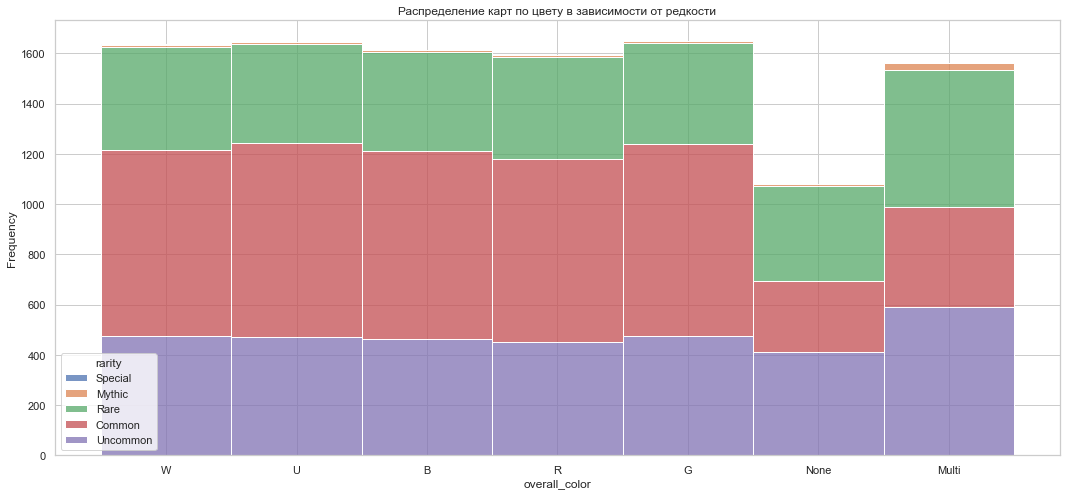

In [20]:
sns.histplot(data = all_cards_df, x = all_cards_df['overall_color'],
             hue = all_cards_df['rarity'],
             hue_order = ['Special', 'Mythic', 'Rare', 'Common', 'Uncommon'],
             stat = 'frequency',
             multiple="stack").set_title('Распределение карт по цвету в зависимости от редкости')

**2) Процент карт, запрещенных в формате Commander, а также распределение по типу для этих карт**

In [21]:
# Колонка содержит список словарей
all_cards_df.iloc[0]["legalities"]

"[{'format': 'Commander', 'legality': 'Legal'}, {'format': 'Duel', 'legality': 'Legal'}, {'format': 'Legacy', 'legality': 'Legal'}, {'format': 'Modern', 'legality': 'Legal'}, {'format': 'Paupercommander', 'legality': 'Restricted'}, {'format': 'Penny', 'legality': 'Legal'}, {'format': 'Premodern', 'legality': 'Legal'}, {'format': 'Vintage', 'legality': 'Legal'}]"

In [23]:
#Взрываем список
df_legalities = all_cards_df.explode('legalities')

In [24]:
df_legalities.reset_index(drop=True, inplace=True)

# Заменим NaN на пустые словари
def replace_nans_with_dict(series):
    for idx in series[series.isnull()].index:
        series.at[idx] = {}
    return series



# Теперь взрываем словари внутри списка
def df_explosion(df, col_name:str):

    if df[col_name].isna().any():
        df[col_name] = replace_nans_with_dict(df[col_name])

    df.reset_index(drop=True, inplace=True)

    df1 = pd.DataFrame(df.loc[:,col_name].values.tolist())

    df = pd.concat([df,df1], axis=1)

    df.drop([col_name], axis=1, inplace=True)

    return df

In [25]:
df_legalities = df_explosion(df_legalities, 'legalities')

In [26]:
df_legality = df_legalities[['name', 'type', 'format', 'legality']]

In [27]:
# Процент запрещенных карт
df_legality.groupby(['format', 'legality']).size() / df_legality.groupby('format').size() * 100

format           legality  
Alchemy          Legal         100.000000
Brawl            Banned          0.213295
                 Legal          99.786705
Commander        Banned          0.302568
                 Legal          99.697432
Duel             Banned          0.430120
                 Legal          99.445372
                 Restricted      0.124508
Explorer         Banned          0.151445
                 Legal          99.848555
Future           Banned          0.142197
                 Legal          99.857803
Gladiator        Banned          0.080249
                 Legal          99.919751
Historic         Banned          0.990299
                 Legal          99.009701
Historicbrawl    Banned          0.373888
                 Legal          99.626112
Legacy           Banned          0.483543
                 Legal          99.516457
Modern           Banned          0.450099
                 Legal          99.549901
Oldschool        Banned          0.641026
      

<AxesSubplot:xlabel='type'>

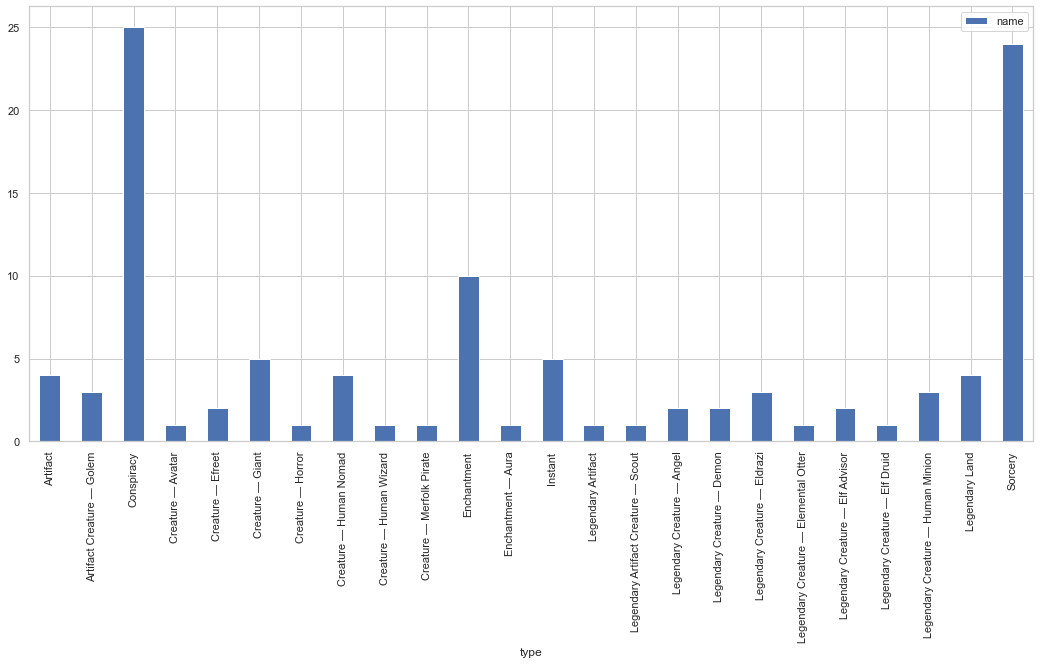

In [28]:
# Распределение запрещенных карт по типу
df_legality.query('format == "Commander" and legality == "Banned"')\
           .groupby('type')\
           .agg({'name':'count'})\
           .plot(kind='bar')

**3) Топ-10 карт, не являющихся землями, которые были напечатаны в наибольшем количестве сетов.**

In [29]:
all_cards_df.type.value_counts()

Instant                                4527
Sorcery                                4143
Enchantment                            2026
Artifact                               1863
Land                                   1816
                                       ... 
Creature — Gnome                          1
Legendary Creature — Kobold               1
Creature — Soldier                        1
Creature — Bird Soldier Warrior           1
Legendary Creature — Elemental Boar       1
Name: type, Length: 2155, dtype: int64

In [30]:
# Существует пять базовых типов земли, каждая из которых может производить одну ману соответствующего типа.
land_list = ['Land', 'Legendary Land', 'Basic Land — Plains',
             'Basic Land — Island', 'Basic Land — Mountain', 'Basic Land — Forest', 'Basic Land — Swamp']

In [31]:
all_cards_df.query('type not in @land_list')\
            .groupby('name')\
            .agg({'set':'count'})\
            .sort_values('set', ascending=False)\
             .head(10)

,set
name,
Pacifism,20
Mind Rot,20
Serra Angel,19
Naturalize,19
Sol Ring,19
Rampant Growth,18
Plummet,18
Swords to Plowshares,18
Gravedigger,17


**4) Для карт, не являющихся землями, определите, какая часть из них даёт ману с помощью своего эффекта. Покажите распределение по типу маны, который дают эти карты.** 

In [32]:
# Попробуем поискать в тексте карт слова
words_list = 'Add one mana'

In [33]:
add_mana = all_cards_df[(pd.concat([all_cards_df.original_text.str.contains(word,regex=False) for word in words_list.split()],axis=1))
          .sum(1) > 1]

In [34]:
# Карты, не являющиеся землями и дающие ману
add_mana.query('type not in @land_list').head()

,name,multiverse_id,layout,mana_cost,cmc,colors,color_identity,type,supertypes,subtypes,...,foreign_names,printings,original_text,original_type,legalities,image_url,set,set_name,id,overall_color
340,Birds of Paradise,129906.0,normal,{G},1.0,['Green'],['G'],Creature — Bird,NaN,['Bird'],...,"[{'name': 'Paradiesvögel', 'text': 'Fliegend (...","['10E', '2ED', '3ED', '4BB', '4ED', '5ED', '6E...",Flying (This creature can't be blocked except ...,Creature - Bird,"[{'format': 'Commander', 'legality': 'Legal'},...",http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,28e56ac7-6a09-5118-9ade-6755b051bc0b,G
364,Joiner Adept,130500.0,normal,{1}{G},2.0,['Green'],['G'],Creature — Elf Druid,NaN,"['Elf', 'Druid']",...,"[{'name': 'Meisterschreiner', 'text': 'Länder,...","['10E', '5DN']","Lands you control have ""{T}: Add one mana of a...",Creature - Elf Druid,"[{'format': 'Commander', 'legality': 'Legal'},...",http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,2f39f144-a02a-5017-a45a-4a3cfc2c7a36,G
367,Llanowar Elves,129626.0,normal,{G},1.0,['Green'],['G'],Creature — Elf Druid,NaN,"['Elf', 'Druid']",...,"[{'name': 'Llanowarelfen', 'text': '{T}: Erhöh...","['10E', '2ED', '3ED', '4BB', '4ED', '5ED', '6E...",{T}: Add {G} to your mana pool.,Creature - Elf Druid,"[{'format': 'Commander', 'legality': 'Legal'},...",http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,51106f17-5dd1-5853-b45b-453d83b9d979,G
424,Chromatic Star,135279.0,normal,{1},1.0,NaN,NaN,Artifact,NaN,NaN,...,"[{'name': 'Chromatischer Stern', 'text': '{1},...","['10E', '2XM', 'MB1', 'TSP', 'TSR']","{1}, {T}, Sacrifice Chromatic Star: Add one ma...",Artifact,"[{'format': 'Commander', 'legality': 'Legal'},...",http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,3785490a-01f5-511d-b471-60b1209b3d4f,None
430,Composite Golem,135275.0,normal,{6},6.0,NaN,"['B', 'G', 'R', 'U', 'W']",Artifact Creature — Golem,NaN,['Golem'],...,"[{'name': 'Kompositgolem', 'text': 'Opfere den...","['10E', '5DN']",Sacrifice Composite Golem: Add {W}{U}{B}{R}{G}...,Artifact Creature - Golem,"[{'format': 'Commander', 'legality': 'Legal'},...",http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,7db42d14-4950-5478-b87c-fbbd93889801,Multi


In [35]:
# Количество таких карт
add_mana.query('type not in @land_list').shape[0]

1755

<AxesSubplot:xlabel='color_identity'>

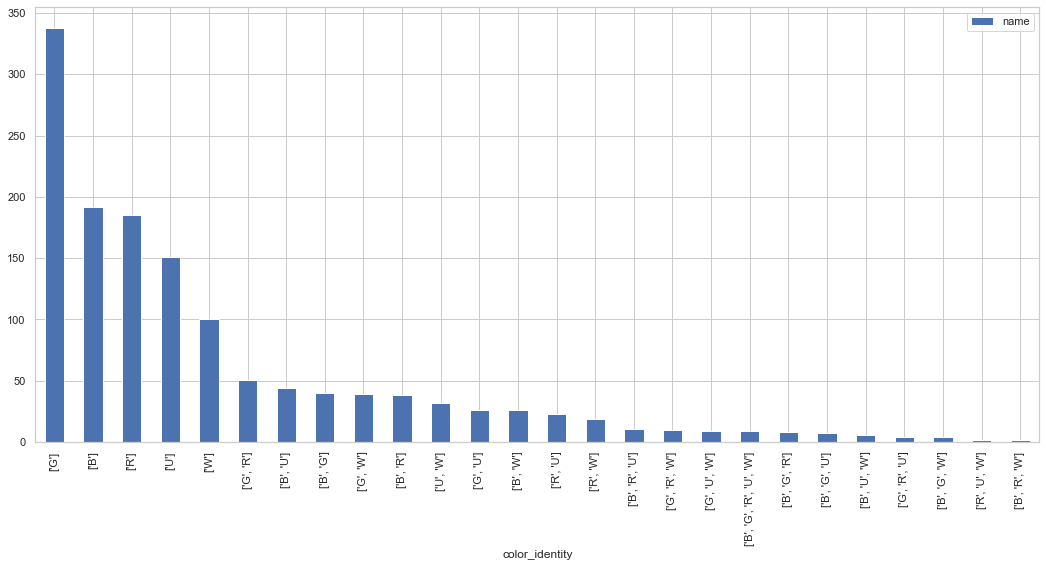

In [36]:
# Распределение по цветам маны
add_mana.query('type not in @land_list')\
            .groupby('color_identity')\
            .agg({'name':'count'})\
            .sort_values('name', ascending=False)\
            .plot(kind = 'bar')